In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("loan_prediction.csv")
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
363,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban,Y
206,LP001693,Female,No,0,Graduate,No,3244,0.0,80.0,360.0,1.0,Urban,Y
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
491,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y
139,LP001493,Male,Yes,2,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,N
192,LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,N
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
149,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
159,LP001552,Male,Yes,0,Graduate,No,4583,5625.0,255.0,360.0,1.0,Semiurban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

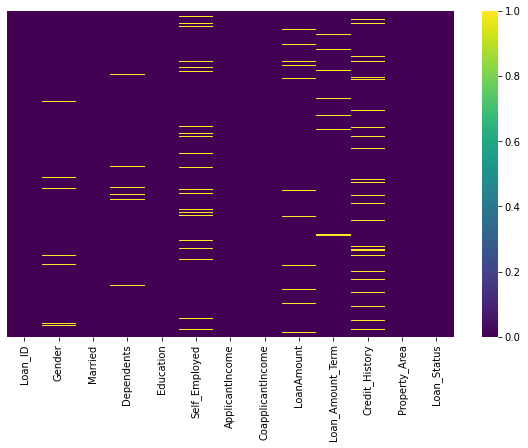

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [7]:
data.drop("Loan_ID",axis=1,inplace=True)
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
384,Male,Yes,2,Graduate,No,4566,0.0,100.0,360.0,1.0,Urban,N
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
515,Male,Yes,3+,Graduate,No,3466,3428.0,150.0,360.0,1.0,Rural,Y
466,Male,Yes,3+,Not Graduate,No,2947,1664.0,70.0,180.0,0.0,Urban,N
537,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
287,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
160,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y
412,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N


In [8]:
### Replacing the "nan" with mode in all the categorical data

In [9]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [10]:
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
445,Male,Yes,1,Graduate,Yes,3466,1210.0,130.0,360.0,1.0,Rural,Y
29,Female,No,2,Graduate,No,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
201,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
433,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban,Y
93,Male,No,0,Graduate,No,4133,0.0,122.0,360.0,1.0,Semiurban,Y
281,Male,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban,Y
249,Male,Yes,0,Graduate,No,1809,1868.0,90.0,360.0,1.0,Urban,Y
464,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
549,Male,Yes,0,Graduate,No,2785,2016.0,110.0,360.0,1.0,Rural,Y


<AxesSubplot:>

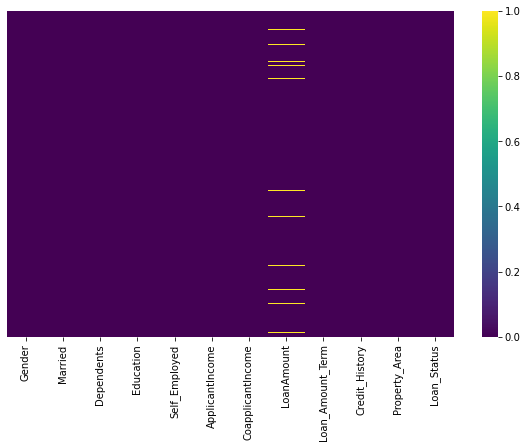

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [12]:
# filling the missing values ny median (Loan Amount)

In [13]:
data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

<AxesSubplot:>

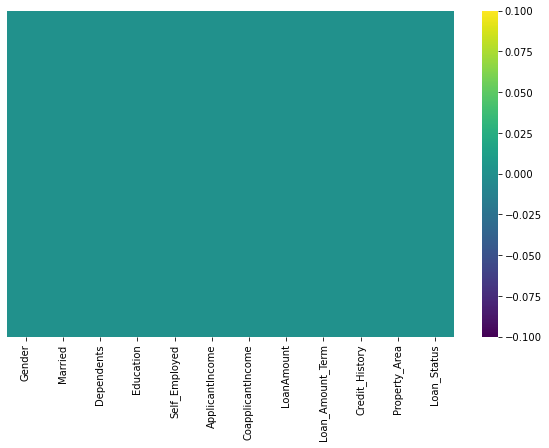

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [15]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [17]:
# here 'depnendents' column is object type because of '3+'

In [18]:
#All values of "Dependents" columns were of "str" form now converting to "int" form.

In [19]:
data["Dependents"] = data["Dependents"].replace("3+",int(3))
data["Dependents"] = data["Dependents"].replace("1",int(1))
data["Dependents"] = data["Dependents"].replace("2",int(2))
data["Dependents"] = data["Dependents"].replace("0",int(0))

In [20]:
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
395,Male,Yes,2,Graduate,No,3276,484.0,135.0,360.0,1.0,Semiurban,Y
263,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,1.0,Rural,Y
372,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y
502,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban,Y
325,Male,Yes,1,Graduate,Yes,8666,4983.0,376.0,360.0,0.0,Rural,N
330,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
334,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
456,Male,Yes,0,Graduate,No,4301,0.0,118.0,360.0,1.0,Urban,Y
426,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,N
302,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [22]:
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

# Now, our dataset is ready

In [23]:
data.sample(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
159,1,1,0,0,0,4583,5625.0,255.0,360.0,1.0,1,1
145,0,1,0,0,0,2330,4486.0,100.0,360.0,1.0,1,1
555,1,1,1,0,0,5468,1032.0,26.0,360.0,1.0,1,1
40,1,0,0,0,0,3600,0.0,80.0,360.0,1.0,2,0
531,1,1,3,0,0,4281,0.0,100.0,360.0,1.0,2,1
332,1,0,0,0,0,2833,0.0,71.0,360.0,1.0,2,1
494,1,1,0,0,0,3597,2157.0,119.0,360.0,0.0,0,0
395,1,1,2,0,0,3276,484.0,135.0,360.0,1.0,1,1
549,1,1,0,0,0,2785,2016.0,110.0,360.0,1.0,0,1
553,1,1,0,1,0,2454,2333.0,181.0,360.0,0.0,2,0


## Visualizing the data

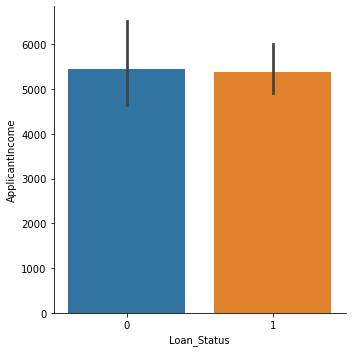

In [24]:
sns.catplot(x='Loan_Status',y='ApplicantIncome',kind='bar',data=data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

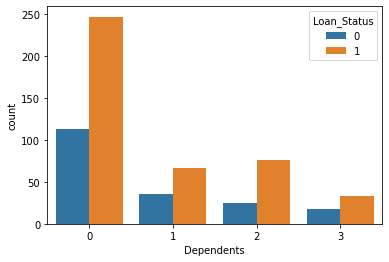

In [25]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

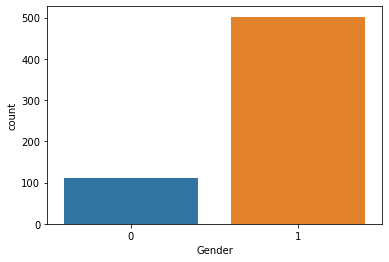

In [26]:
sns.countplot(x='Gender',data=data)

# Fit the Model

In [27]:
x= data.drop('Loan_Status',axis=1)
y= data['Loan_Status']

In [28]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.30)

In [29]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
predictions = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8108108108108109

In [32]:
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1])

# Predict the loan approval for a particular customer

#Notes:

1. For Male please enter 1 and for Female please enter 0

2. For Married customer please enter 1 and for single customer please enter 0

3. If the customer is Not Graduate please enter 1 and if the customer is Graduate please enter 0

4. If the customer is Self employed please enter 1, otherwise please enter 0

5. For property in rural area please enter 0,For property in semiurban please enter 1, and for property in urban area please enter 2

6. Please enter the amount value in us dollar


In [33]:
values=[0]*x.shape[1]
values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
data=np.array(x.columns)

In [35]:
data

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype=object)

In [36]:
for i in range(0, x.shape[1]):
    values[i]=int((print(f'Enter the value for',data[i] )))
values=np.reshape(values,[1,11])
customer= pd.DataFrame(values, index=range(1), columns=x.columns)
loan_Status=model.predict(customer)
if loan_Status[0]==1:
    print('\n\n Congratulations: The Loan is approved for you')
else:
    print('\n\n Sorry: The Loan is not approved for you')

Enter the value for Gender
None1
Enter the value for Married
None1
Enter the value for Dependents
None3
Enter the value for Education
None1
Enter the value for Self_Employed
None1
Enter the value for ApplicantIncome
None10000
Enter the value for CoapplicantIncome
None5000
Enter the value for LoanAmount
None499
Enter the value for Loan_Amount_Term
None360
Enter the value for Credit_History
None1
Enter the value for Property_Area
None1


 Congratulations: The Loan is approved for you
